<center><h2>Convolution-Deconvolution</h2></center>

In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [27]:
#img = cv2.imread("input2.png",0)
img = cv2.imread("blurred2.exr", cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)

In [28]:
img.shape

(240L, 320L)

In [29]:
def show(im):
    cv2.imshow('image',im)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [30]:
def ft(im, newsize=None):
    dft = np.fft.fft2(np.float32(im),newsize)
    return np.fft.fftshift(dft)

def ift(shift):
    f_ishift = np.fft.ifftshift(shift)
    img_back = np.fft.ifft2(f_ishift)
    return np.abs(img_back)

In [31]:
gk = cv2.getGaussianKernel(21,5)
gk = gk * gk.T

#imf = ft(img, (img.shape[0],img.shape[1])) # make sure sizes match
#gkf = ft(gk, (img.shape[0],img.shape[1])) # so we can multiple easily
#imconvf = imf * gkf

# now for example we can reconstruct the blurred image from its FT
#blurred = ift(imconvf)

# now for example we can reconstruct the blurred image from its FT
#blurred = numpy.array(blurred, dtype = numpy.uint8)

In [40]:
#De-covolution
imf = ft(img, (img.shape[0],img.shape[1])) # make sure sizes match
#gki = np.linalg.inv(gk)
gkf = ft(gk, (img.shape[0],img.shape[1])) # so we can multiple easily
#gkfi = np.linalg.inv(gkf)
imconvf = imf / gkf

# now for example we can reconstruct the blurred image from its FT
original = ift(imconvf)

# now for example we can reconstruct the blurred image from its FT
original = np.array(original, dtype = np.float32)*255

In [43]:
cv2.imwrite("original.png", original)

True

In [41]:
show(original)

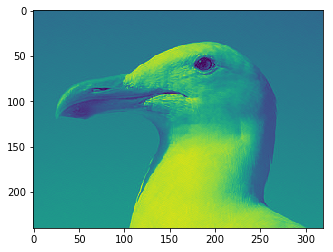

In [42]:
plt.imshow(original)
plt.show()

In [132]:
a = np.array([[1., 2.], [3., 4.]])
ainv = numpy.linalg.inv(a)
a.dot(ainv)

array([[  1.00000000e+00,   1.11022302e-16],
       [  0.00000000e+00,   1.00000000e+00]])

In [136]:
a = gk
ainv = numpy.linalg.inv(a)
i = a.dot(ainv)

In [112]:
A = numpy.matrix(gkf)
ai = numpy.linalg.inv(A)
I = A*ai
numpy.linalg.det()

C:\Users\Bhavya\Anaconda2\lib\site-packages\numpy\linalg\linalg.py:1821: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


(inf-inf*j)